In [1]:
# What is knn clustering
# https://www.youtube.com/watch?v=_aWzGGNrcic
# How to find the optimal k
# https://www.youtube.com/watch?v=xNfOheh-res

In [2]:
# Function to read csv file
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line2 = line1.replace("Iris-setosa","1")
        line3 = line2.replace("Iris-versicolor","0")
        line4 = line3.replace("Iris-virginica","2")
        line_split=line4.split(",")
        data_array.append(line_split)
    return data_array

In [3]:
import numpy as np

In [4]:
iris_data = read_file("iris_dataset.csv")
# Convert Iris data to numpy array
dataset = np.array(iris_data)
X2 = dataset[:,0:4]
y2 = dataset[:,4]

In [8]:
dataset[1:5]

array([['4.9', '3', '1.4', '0.2', '1'],
       ['4.7', '3.2', '1.3', '0.2', '1'],
       ['4.6', '3.1', '1.5', '0.2', '1'],
       ['5', '3.6', '1.4', '0.2', '1']], dtype='<U3')

In [9]:
type(dataset)

numpy.ndarray

In [6]:
# Change string values to float numbers
X = X2.astype(np.float)
# Change target values to integers
y = y2.astype(np.int)

In [20]:
"""
Documentation on k-means
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
"""

'\nDocumentation on k-means\nhttp://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html\n'

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Finding the optimum number of clusters for k-means classification
# n_clusters = Number of centroids to generate
# init = k-means++ = select convergence method
# max_iter = Maximum number of iterations of the k-means algorithm for a single run.
# n_init = 10 = Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state = 0 = random number generator is the RandomState instance used by np.random
# inertia = Sum of squared distances of samples to their closest cluster center
# WCSS = Witchin cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 680.8244
2 152.36870647733906
3 78.94084142614602
4 57.31787321428571
5 46.56163015873016
6 38.930963049671746
7 34.19068792479662
8 30.063874432733137
9 27.84235606060606
10 26.04820224804436


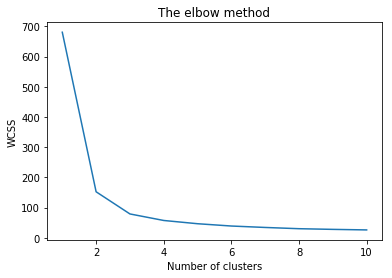

In [22]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [23]:
"""
Plot a line chart of the SSE for each value of k. If the line chart looks like an arm, 
then the "elbow" on the arm is the value of k that is the best. The idea is that we want a
small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when
k is equal to the number of data points in the dataset, because then each data point is its
own cluster, and there is no error between it and the center of its cluster). So our goal is
to choose a small value of k that still has a low SSE, and the elbow usually represents
where we start to have diminishing returns by increasing k.
"""

'\nPlot a line chart of the SSE for each value of k. If the line chart looks like an arm, \nthen the "elbow" on the arm is the value of k that is the best. The idea is that we want a\nsmall SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when\nk is equal to the number of data points in the dataset, because then each data point is its\nown cluster, and there is no error between it and the center of its cluster). So our goal is\nto choose a small value of k that still has a low SSE, and the elbow usually represents\nwhere we start to have diminishing returns by increasing k.\n'

In [24]:
# After number of clusters = 3, WCSS does not decrease significantly.
# k =3 is the optimal number of clusters in the data

In [12]:
# best_n_clusters = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
print(kmeans.cluster_centers_) # Centroid ccordinates

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [14]:
print(kmeans.labels_) # labels signifying similarity only

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
from sklearn import metrics
print(metrics.classification_report(y, kmeans.labels_))
# 0 = Versicolor
# 1 = Setosa
# 2 = Virginica

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

   micro avg       0.89      0.89      0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

